In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from solution import MultinomialLogReg, OrdinalLogReg
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import random

In [2]:
df = pd.read_csv("dataset.csv", delimiter=";")
df = df.drop(columns="TwoLegged")
transformer = ColumnTransformer(
    transformers=[
        ("pass", "passthrough", ["Transition"]),
        ("cat1", OneHotEncoder(drop=["EURO"]), ["Competition"]),
        ("cat2", OneHotEncoder(drop=["dribble or cut"]), ["Movement"]),
        ("cat3", OneHotEncoder(drop=["G"]), ["PlayerType"]),
        ("scaled", StandardScaler(), ["Angle", "Distance"])
    ]
)

# CV to see if the models work

In [6]:
class multinomial_for_scikit(BaseEstimator, ClassifierMixin):

    def __init__(self):
        pass
    
    def fit(self, X, y):
        self.model = MultinomialLogReg()
        self.model.build(X, y)
        self.classes_ = np.unique(y)
        return self

    def predict(self, X):
        return np.argmax(self.model.predict(X), axis=1)
    
    def predict_proba(self, X):
        return self.model.predict(X)
    
class ordinal_for_scikit(BaseEstimator, ClassifierMixin):

    def __init__(self):
        pass
    
    def fit(self, X, y):
        self.model = OrdinalLogReg()
        self.model.build(X, y)
        self.classes_ = np.unique(y)
        return self

    def predict(self, X):
        return np.argmax(self.model.predict(X), axis=1)
    
    def predict_proba(self, X):
        return self.model.predict(X)

In [14]:
y = df["ShotType"]
y = LabelEncoder().fit_transform(y)
X = df.drop(columns="ShotType")

pipeline = Pipeline([
    ("preprocessing", transformer),
    ("classifier", multinomial_for_scikit())
])

multi_scores = cross_validate(pipeline, X, y, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42), scoring=["accuracy", "neg_log_loss"])

In [23]:
accs = multi_scores["test_accuracy"]
mean_accs = np.mean(accs)
sd_accs = np.std(accs)
se_accs = sd_accs/(np.sqrt(len(accs)))
print(f"Multinomial Logistic Regression Accuracy: {mean_accs} +/- {se_accs}")
logs = np.abs(multi_scores["test_neg_log_loss"])
mean_logs = np.mean(logs)
sd_logs = np.std(logs)
se_logs = sd_logs/(np.sqrt(len(logs)))
print(f"Multinomial Logistic Regression Accuracy: {mean_logs} +/- {se_logs}")

Multinomial Logistic Regression Accuracy: 0.7265070929007628 +/- 0.005681763992552471
Multinomial Logistic Regression Accuracy: 0.6884797555039621 +/- 0.012495912293154377


In [15]:
y = df["ShotType"]
y = LabelEncoder().fit_transform(y)
X = df.drop(columns="ShotType")

pipeline = Pipeline([
    ("preprocessing", transformer),
    ("classifier", ordinal_for_scikit())
])

ordinal_scores = cross_validate(pipeline, X, y, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42), scoring=["accuracy", "neg_log_loss"])

In [24]:
accs = ordinal_scores["test_accuracy"]
mean_accs = np.mean(accs)
sd_accs = np.std(accs)
se_accs = sd_accs/(np.sqrt(len(accs)))
print(f"Ordinal Logistic Regression Accuracy: {mean_accs} +/- {se_accs}")
logs = np.abs(ordinal_scores["test_neg_log_loss"])
mean_logs = np.mean(logs)
sd_logs = np.std(logs)
se_logs = sd_logs/(np.sqrt(len(logs)))
print(f"Ordinal Logistic Regression Accuracy: {mean_logs} +/- {se_logs}")

Ordinal Logistic Regression Accuracy: 0.7040193104322274 +/- 0.0036497447947493075
Ordinal Logistic Regression Accuracy: 0.9925966601125914 +/- 0.012644449903695428


In [195]:
df.groupby("Competition").count()

,ShotType,PlayerType,Transition,Movement,Angle,Distance
Competition,,,,,,
EURO,1371,1371,1371,1371,1371,1371
NBA,1228,1228,1228,1228,1228,1228
SLO1,1182,1182,1182,1182,1182,1182
U14,738,738,738,738,738,738
U16,505,505,505,505,505,505


# Correlation analysis

In [36]:
dropless_transformer = ColumnTransformer(
    transformers=[
        ("pass", "passthrough", ["Transition", "TwoLegged"]),
        ("categorical", OneHotEncoder(), ["Competition", "Movement", "PlayerType"]),
        ("scaled", StandardScaler(), ["Angle", "Distance"])
    ]
)

In [ ]:
df = pd.read_csv("dataset.csv", delimiter=";")
y = df["ShotType"]
X = df.drop(columns="ShotType")

y = df["ShotType"]
X = df.drop(columns="ShotType")

dropless_X = dropless_transformer.fit_transform(X)
dropless_y = LabelEncoder().fit_transform(y)



dropless_transformed_df = pd.DataFrame(dropless_X, columns=dropless_transformer.get_feature_names_out())
dropless_transformed_df = dropless_transformed_df.drop(columns="categorical__PlayerType_G")
dropless_transformed_df = dropless_transformed_df.drop(columns="pass__TwoLegged")
dropless_transformed_df = dropless_transformed_df.drop(columns="categorical__Movement_dribble or cut")
#The drops were performed and the |correlation| is never more than 0.7
dropless_transformed_df["ShotType"] = dropless_y

,pass__Transition,categorical__Competition_EURO,categorical__Competition_NBA,categorical__Competition_SLO1,categorical__Competition_U14,categorical__Competition_U16,categorical__Movement_drive,categorical__Movement_no,categorical__PlayerType_C,categorical__PlayerType_F,scaled__Angle,scaled__Distance,ShotType
pass__Transition,1.000000,0.017712,-0.012531,-0.063315,0.057173,0.013676,-0.053483,-0.239188,-0.048375,-0.009976,0.031282,-0.172259,0.164722
categorical__Competition_EURO,0.017712,1.000000,-0.348442,-0.339800,-0.254212,-0.204795,0.003446,0.037126,-0.021373,-0.005856,0.127379,0.050707,-0.031258
categorical__Competition_NBA,-0.012531,-0.348442,1.000000,-0.315476,-0.236014,-0.190134,-0.013800,0.079761,-0.050012,0.008066,-0.115271,0.056066,-0.077663
categorical__Competition_SLO1,-0.063315,-0.339800,-0.315476,1.000000,-0.230161,-0.185419,-0.012383,0.051188,0.039772,-0.027368,-0.051103,0.042212,-0.048852
categorical__Competition_U14,0.057173,-0.254212,-0.236014,-0.230161,1.000000,-0.138716,0.033009,-0.138634,0.015028,-0.005401,0.003405,-0.125259,0.125320
categorical__Competition_U16,0.013676,-0.204795,-0.190134,-0.185419,-0.138716,1.000000,-0.006775,-0.077989,0.029344,0.042114,0.044127,-0.067328,0.078677
categorical__Movement_drive,-0.053483,0.003446,-0.013800,-0.012383,0.033009,-0.006775,1.000000,-0.402647,-0.030261,0.012764,0.038836,-0.163799,0.272989
categorical__Movement_no,-0.239188,0.037126,0.079761,0.051188,-0.138634,-0.077989,-0.402647,1.000000,0.095940,0.068608,-0.037497,0.430129,-0.506148
categorical__PlayerType_C,-0.048375,-0.021373,-0.050012,0.039772,0.015028,0.029344,-0.030261,0.095940,1.000000,-0.334805,-0.016393,-0.248804,0.077433
categorical__PlayerType_F,-0.009976,-0.005856,0.008066,-0.027368,-0.005401,0.042114,0.012764,0.068608,-0.334805,1.000000,0.033606,-0.034793,-0.008191


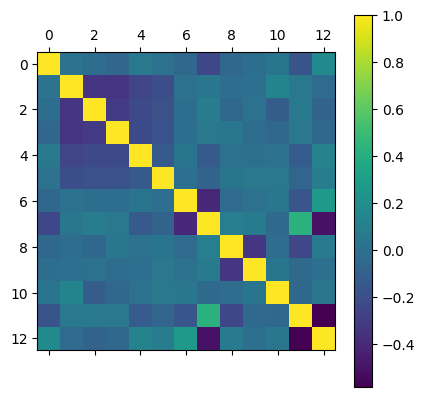

In [48]:
cm2 = dropless_transformed_df.corr()
plt.matshow(cm2)
plt.colorbar()
cm2
cm2

This shows that the following should be dropped:\
* Two Legged
* Dribble or cut
* Player type G

# Bootstrap pipeline

In [25]:
n_rows = df.shape[0]
indices = range(n_rows)
bootstrap_repetitions = 100
all_betas = np.zeros((5, 12, bootstrap_repetitions))

for i in range(bootstrap_repetitions):
    bootstrap_indices = random.choices(indices, k=n_rows)
    bootstrap_dataset = df.loc[bootstrap_indices]

    y = bootstrap_dataset["ShotType"]
    X = bootstrap_dataset.drop(columns="ShotType")

    transformer.fit(X)
    transformed_X = transformer.transform(X)

    encoder = LabelEncoder()
    encoder.fit(y)

    encoded_y = encoder.transform(y)

    mult_reg = MultinomialLogReg()
    mult_reg.build(transformed_X, encoded_y)

    betas = mult_reg.betas.T

    all_betas[:, :, i] = betas

transformed_df = pd.DataFrame(transformed_X, columns=transformer.get_feature_names_out())


In [110]:
np.save("all_betas", all_betas)

In [31]:
columns = transformer.get_feature_names_out()
columns = np.append(columns, np.array("Intercept"))

In [90]:
coefs_df = pd.DataFrame(np.mean(all_betas, axis=2), columns=columns, index=encoder.inverse_transform([i for i in range(mult_reg.betas.shape[1])]))

coefs_df.to_csv("coefficients.csv")

In [129]:
errors_df = pd.DataFrame(np.std(all_betas, axis=2), columns=columns, index=encoder.inverse_transform([i for i in range(mult_reg.betas.shape[1])]))
errors_df.to_csv("errors.csv")
errors_df

,pass__Transition,cat1__Competition_NBA,cat1__Competition_SLO1,cat1__Competition_U14,cat1__Competition_U16,cat2__Movement_drive,cat2__Movement_no,cat3__PlayerType_C,cat3__PlayerType_F,scaled__Angle,scaled__Distance,Intercept
above head,0.397458,0.440187,0.400084,0.779673,2.422119,0.757581,1.172233,0.419902,0.396336,0.167045,1.001225,1.533562
dunk,0.407675,0.476209,0.423201,0.789217,2.979709,0.056126,1.201369,0.442225,0.482778,0.205918,1.175207,0.766181
hook shot,0.450562,0.439154,0.372970,0.791958,2.490566,0.203545,1.001800,0.407752,0.402545,0.162289,0.996225,0.509712
layup,0.405035,0.446053,0.392340,0.754445,2.426336,0.642459,1.171135,0.422832,0.394878,0.168208,0.976587,1.543480
other,0.431337,0.466778,0.412645,0.775281,2.427155,0.640338,1.179309,0.477815,0.391777,0.172296,1.003194,1.519601


<Axes: >

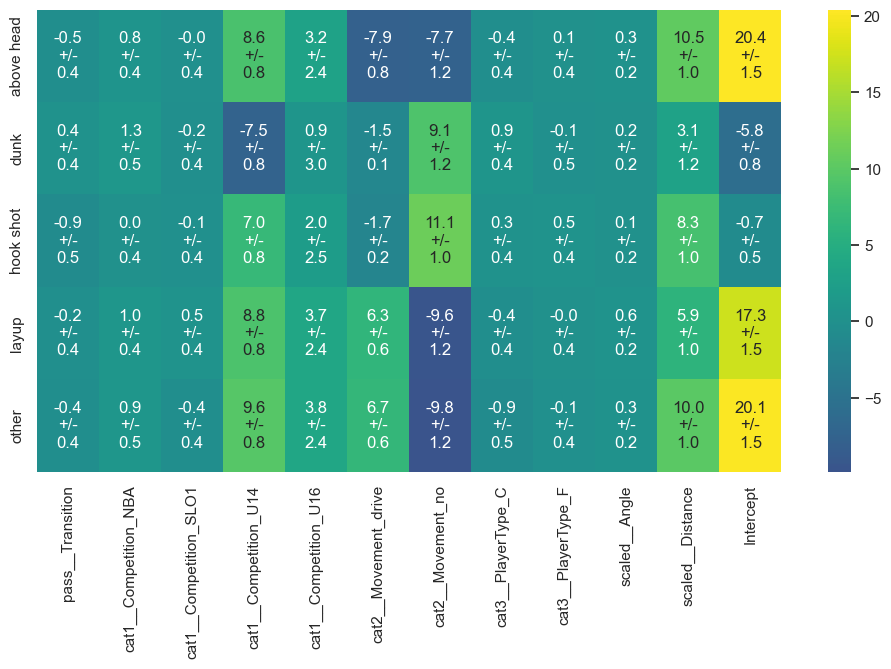

In [134]:
import seaborn as sns
coefs_array = np.mean(all_betas, axis=2)
errors_array = np.std(all_betas, axis=2)
coefs_str = np.char.mod('%.1f', coefs_array.astype(np.float32))  # Format coefficients
errors_str = np.char.mod('%.1f', errors_array.astype(np.float32))  # Format errors

# Combine coefficients and errors with " ± " between them
annot_array = np.core.defchararray.add(coefs_str, '\n+/-\n')
annot_array = np.core.defchararray.add(annot_array, errors_str)

# Now plot the heatmap with annotations
plt.figure(figsize=(12, 6))
sns.heatmap(coefs_df, annot=annot_array, center=0, cmap="viridis", fmt="", cbar=True)

<Axes: >

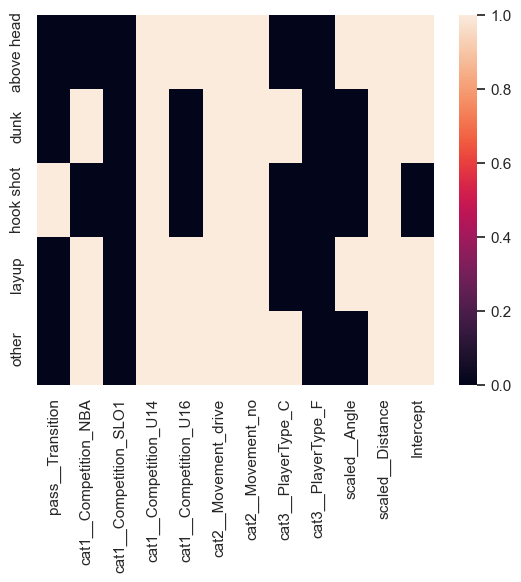

In [113]:
lower_bound = np.percentile(all_betas, 2.5, axis=2)
upper_bound = np.percentile(all_betas, 97.5, axis=2)
significance = (lower_bound > 0) | (upper_bound < 0)
all_betas_significance = pd.DataFrame(significance, columns=columns, index=encoder.inverse_transform([i for i in range(mult_reg.betas.shape[1])]))
sns.heatmap(all_betas_significance)

,pass__Transition,one_hot__PlayerType_C,one_hot__PlayerType_G,categorical__Competition_NBA,categorical__Competition_SLO1,categorical__Competition_U14,categorical__Competition_U16,categorical__Movement_drive,categorical__Movement_no,scaled__Angle,scaled__Distance
pass__Transition,1.000000,-0.048375,0.045597,-0.012531,-0.063315,0.057173,0.013676,-0.053483,-0.239188,0.031282,-0.172259
one_hot__PlayerType_C,-0.048375,1.000000,-0.422036,-0.050012,0.039772,0.015028,0.029344,-0.030261,0.095940,-0.016393,-0.248804
one_hot__PlayerType_G,0.045597,-0.422036,1.000000,0.029456,-0.003265,-0.005987,-0.062354,0.010238,-0.137402,-0.020133,0.218623
categorical__Competition_NBA,-0.012531,-0.050012,0.029456,1.000000,-0.315476,-0.236014,-0.190134,-0.013800,0.079761,-0.115271,0.056066
categorical__Competition_SLO1,-0.063315,0.039772,-0.003265,-0.315476,1.000000,-0.230161,-0.185419,-0.012383,0.051188,-0.051103,0.042212
categorical__Competition_U14,0.057173,0.015028,-0.005987,-0.236014,-0.230161,1.000000,-0.138716,0.033009,-0.138634,0.003405,-0.125259
categorical__Competition_U16,0.013676,0.029344,-0.062354,-0.190134,-0.185419,-0.138716,1.000000,-0.006775,-0.077989,0.044127,-0.067328
categorical__Movement_drive,-0.053483,-0.030261,0.010238,-0.013800,-0.012383,0.033009,-0.006775,1.000000,-0.402647,0.038836,-0.163799
categorical__Movement_no,-0.239188,0.095940,-0.137402,0.079761,0.051188,-0.138634,-0.077989,-0.402647,1.000000,-0.037497,0.430129
scaled__Angle,0.031282,-0.016393,-0.020133,-0.115271,-0.051103,0.003405,0.044127,0.038836,-0.037497,1.000000,-0.056968


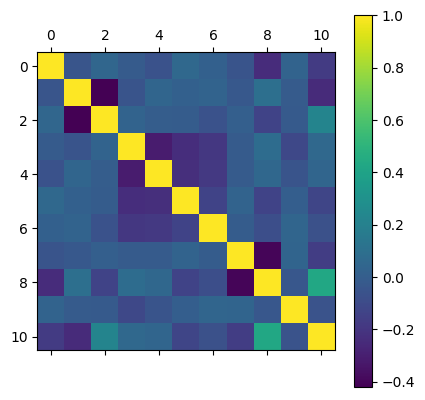

In [38]:
cm = transformed_df.corr()
plt.matshow(cm)
plt.colorbar()
cm

In [187]:
df = pd.read_csv("dataset.csv", delimiter=";")
df = df.drop(columns="TwoLegged")

y = df["ShotType"]
X = df.drop(columns="ShotType")

transformed_X = transformer.fit_transform(X)
encoded_y = encoder.fit_transform(y)

mult_reg = MultinomialLogReg()
mult_reg.build(transformed_X, encoded_y)

(array([-4.99790399e-01,  3.80924434e-01, -8.73974524e-01, -1.72499959e-01,
       -3.77583765e-01,  7.46015184e-01,  1.21348173e+00,  1.36067919e-02,
        9.99756080e-01,  9.14721229e-01, -1.48686918e-02, -2.26243776e-01,
       -8.80039887e-02,  4.59735168e-01, -4.02382946e-01,  7.57875387e+00,
       -7.15632894e+00,  5.93067039e+00,  7.71737515e+00,  8.50153476e+00,
        2.17885641e+00,  9.41868890e-02,  1.07968431e+00,  2.77121312e+00,
        2.79968470e+00, -7.67724109e+00, -1.49334453e+00, -1.70233747e+00,
        6.06187971e+00,  6.48968044e+00, -6.84305624e+00,  8.49893083e+00,
        1.08796507e+01, -8.73508076e+00, -8.96219105e+00, -3.46053621e-01,
        9.56715788e-01,  3.32824918e-01, -3.70248456e-01, -8.79387207e-01,
        2.12936271e-01, -1.16995816e-02,  4.96357411e-01,  6.18158303e-02,
        1.27166457e-02,  3.48114824e-01,  2.25855803e-01,  9.78059132e-02,
        6.48197301e-01,  3.51166538e-01,  1.02781837e+01,  3.12550515e+00,
        8.15814479e+00, 

In [31]:
uniq = df["ShotType"].unique()
encoder.transform(uniq)
[i for i in range(mult_reg.betas.shape[1])]

[0, 1, 2, 3, 4]

So apparently one way to calculate the SE for each beta is sqrt(Var-Cov matrix of betas) and then every diagonal element. But after more reading this appears to be impossible without the Hessian or gradients for each observation?\
Bootstrap appears to be the only option.

In [188]:
columns = transformer.get_feature_names_out()
columns = np.append(columns, np.array("Intercept"))

In [ ]:
betas = pd.DataFrame(mult_reg.betas.T, columns=columns, index=encoder.inverse_transform([i for i in range(mult_reg.betas.shape[1])]))
betas

,pass__Transition,cat1__Competition_NBA,cat1__Competition_SLO1,cat1__Competition_U14,cat1__Competition_U16,cat2__Movement_drive,cat2__Movement_no,cat3__PlayerType_C,cat3__PlayerType_F,scaled__Angle,scaled__Distance,Intercept
above head,-0.499790,0.746015,-0.014869,7.578754,2.178856,-7.677241,-6.843056,-0.346054,0.212936,0.348115,10.278184,19.260053
dunk,0.380924,1.213482,-0.226244,-7.156329,0.094187,-1.493345,8.498931,0.956716,-0.011700,0.225856,3.125505,-5.283779
hook shot,-0.873975,0.013607,-0.088004,5.930670,1.079684,-1.702337,10.879651,0.332825,0.496357,0.097806,8.158145,-0.768507
layup,-0.172500,0.999756,0.459735,7.717375,2.771213,6.061880,-8.735081,-0.370248,0.061816,0.648197,5.813866,16.190352
other,-0.377584,0.914721,-0.402383,8.501535,2.799685,6.489680,-8.962191,-0.879387,0.012717,0.351167,9.798387,18.903677


# DATA GENERATING PROCESS

In [56]:
def multinomial_bad_ordinal_good(n_rows):
    np.random.seed(17)
    hitter_power = np.random.normal(0, 1, n_rows)
    hitter_speed = np.random.normal(0, 1, n_rows)
    noise = np.random.normal(0, 1, n_rows)

    predictor = 2 * hitter_power + 0.5 * hitter_speed + noise

    thresholds = [0, 1, 3]
    y = np.digitize(predictor, thresholds)
    return pd.DataFrame({
        "power":hitter_power,
        "speed":hitter_speed,
        "score":y
    })

In [83]:
dgp = multinomial_bad_ordinal_good(250)
y = dgp["score"]
x = dgp.drop(columns="score")

X_train = x.loc[:200]
X_test = x.loc[200:]

y_train = y.loc[:200]
y_test = y.loc[200:]

ordinal = OrdinalLogReg().build(X_train, y_train)
multinomial = MultinomialLogReg().build(X_train, y_train)



In [84]:
print(np.sum(np.argmax(ordinal.predict(X_test), axis=1) == y_test) / len(y_test))
print(np.sum(np.argmax(multinomial.predict(X_test), axis=1) == y_test) / len(y_test))


0.76
0.76
